# Imports
Importing necessary packages and modules

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from torchsummary import summary

from cuda import initialize_cuda
from data.dataset import CIFAR10
from model.resnet import ResNet18
from model.utils.loss import cross_entropy_loss
from model.utils.optimizers import sgd_optimizer
from model.utils.callbacks import lr_scheduler
from train import train
from evaluate import val
from result import class_level_accuracy, plot_metric, save_and_show_result

# Configuration

Set various parameters and hyperparameters

In [0]:
class Args:

    # Data Loading
    # ============

    train_batch_size = 64
    val_batch_size = 64
    num_workers = 4

    # Augmentation
    # ============
    horizontal_flip = 0.2
    vertical_flip = 0.1
    rotation = 15
    random_erasing = 0.3

    # Training
    # ========
    random_seed = 1
    epochs = 50
    learning_rate = 0.01
    momentum = 0.9
    lr_step_size = 25
    lr_gamma = 0.1

    # Evaluation
    # ==========
    sample_count = 25

## Set Seed and Get GPU Availability

In [0]:
# Initialize CUDA and set random seed
cuda, device = initialize_cuda(Args.random_seed)

GPU Available? True


## Download Dataset

Importing the CIFAR-10 class to download dataset and create data loader

In [0]:
dataset = CIFAR10(
    train_batch_size=Args.train_batch_size,
    val_batch_size=Args.val_batch_size,
    cuda=cuda,
    num_workers=Args.num_workers,
    horizontal_flip=Args.horizontal_flip,
    vertical_flip=Args.vertical_flip,
    rotation=Args.rotation,
    random_erasing=Args.random_erasing
)

Files already downloaded and verified
Files already downloaded and verified


## Data Visualization
Let's see how our data looks like. This information will help us decide the transformations that can be used on the dataset.

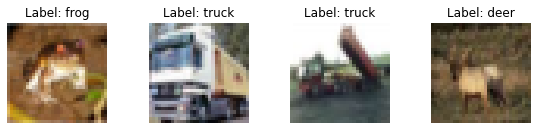

In [0]:
# Fetch data
classes = dataset.classes()
sample_data, sample_targets = dataset.data()

# Set number of images to display
num_images = 4

# Display images with labels
fig, axs = plt.subplots(1, 4, figsize=(8, 8))
fig.tight_layout()

for i in range(num_images):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[sample_targets[i]]}')
    axs[i].imshow(sample_data[i])

## Training and Validation Dataloaders
This is the final step in data preparation. It sets the dataloader arguments and then creates the dataloader

In [0]:
# Create train data loader
train_loader = dataset.loader(train=True)

# Create val data loader
val_loader = dataset.loader(train=False)

# Model Architecture and Summary

In [0]:
model = ResNet18().to(device)  # Create model
summary(model, dataset.image_size())  # Display model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Model Training and Validation

In [0]:
losses = []
accuracies = []
correct_samples = []
incorrect_samples = []

criterion = cross_entropy_loss()  # Create loss function
optimizer = sgd_optimizer(model, Args.learning_rate, Args.momentum)  # Create optimizer
scheduler = lr_scheduler(optimizer, Args.lr_step_size, Args.lr_gamma)
last_epoch = False

for epoch in range(1, Args.epochs + 1):
    print(f'Epoch {epoch}:')
    if epoch == Args.epochs:
        last_epoch = True
    train(model, train_loader, device, optimizer, criterion)
    scheduler.step()
    val(
        model, val_loader, device, criterion, losses, accuracies,
        correct_samples, incorrect_samples, Args.sample_count, last_epoch=last_epoch
    )

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0182, Accuracy: 5756/10000 (57.56%)

Epoch 2:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 7021/10000 (70.21%)

Epoch 3:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0128, Accuracy: 7197/10000 (71.97%)

Epoch 4:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0102, Accuracy: 7776/10000 (77.76%)

Epoch 5:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0091, Accuracy: 7992/10000 (79.92%)

Epoch 6:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0091, Accuracy: 8006/10000 (80.06%)

Epoch 7:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8258/10000 (82.58%)

Epoch 8:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8330/10000 (83.30%)

Epoch 9:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8507/10000 (85.07%)

Epoch 10:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 8491/10000 (84.91%)

Epoch 11:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8541/10000 (85.41%)

Epoch 12:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8551/10000 (85.51%)

Epoch 13:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8600/10000 (86.00%)

Epoch 14:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 8520/10000 (85.20%)

Epoch 15:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8596/10000 (85.96%)

Epoch 16:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8626/10000 (86.26%)

Epoch 17:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8697/10000 (86.97%)

Epoch 18:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8773/10000 (87.73%)

Epoch 19:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8776/10000 (87.76%)

Epoch 20:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8733/10000 (87.33%)

Epoch 21:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8728/10000 (87.28%)

Epoch 22:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0059, Accuracy: 8815/10000 (88.15%)

Epoch 23:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8823/10000 (88.23%)

Epoch 24:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8924/10000 (89.24%)

Epoch 25:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8856/10000 (88.56%)

Epoch 26:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9063/10000 (90.63%)

Epoch 27:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9106/10000 (91.06%)

Epoch 28:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9113/10000 (91.13%)

Epoch 29:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9115/10000 (91.15%)

Epoch 30:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9132/10000 (91.32%)

Epoch 31:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9124/10000 (91.24%)

Epoch 32:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9133/10000 (91.33%)

Epoch 33:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9142/10000 (91.42%)

Epoch 34:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9103/10000 (91.03%)

Epoch 35:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9134/10000 (91.34%)

Epoch 36:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9125/10000 (91.25%)

Epoch 37:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9111/10000 (91.11%)

Epoch 38:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0045, Accuracy: 9139/10000 (91.39%)

Epoch 39:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9127/10000 (91.27%)

Epoch 40:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9135/10000 (91.35%)

Epoch 41:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9117/10000 (91.17%)

Epoch 42:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9133/10000 (91.33%)

Epoch 43:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9128/10000 (91.28%)

Epoch 44:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9116/10000 (91.16%)

Epoch 45:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9139/10000 (91.39%)

Epoch 46:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9134/10000 (91.34%)

Epoch 47:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9151/10000 (91.51%)

Epoch 48:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9122/10000 (91.22%)

Epoch 49:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9133/10000 (91.33%)

Epoch 50:


Loss=0.15 Batch_ID=781 Accuracy=95.89: 100%|██████████| 782/782 [00:30<00:00, 25.36it/s]



Validation set: Average loss: 0.0047, Accuracy: 9128/10000 (91.28%)



## Plotting Results

Plot changes in validation loss

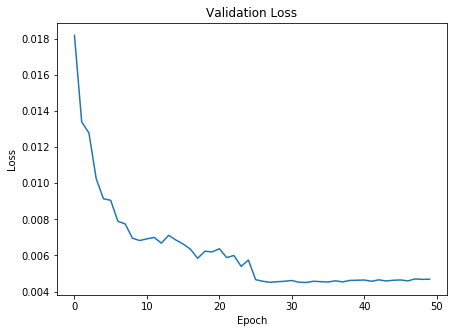

In [0]:
plot_metric(losses, 'Loss')

Plot changes in validation accuracy

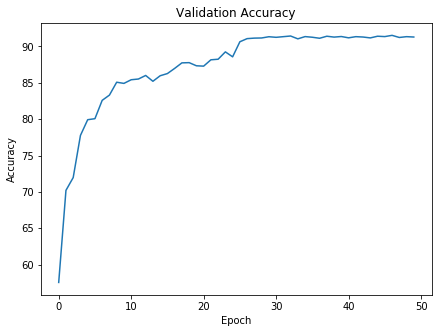

In [0]:
plot_metric(accuracies, 'Accuracy')

## Display Correct and Incorrect Predictions

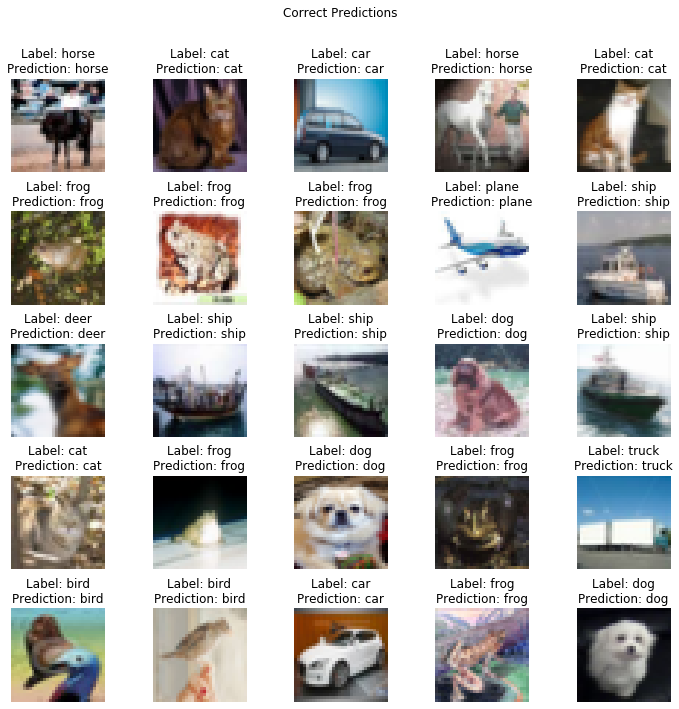

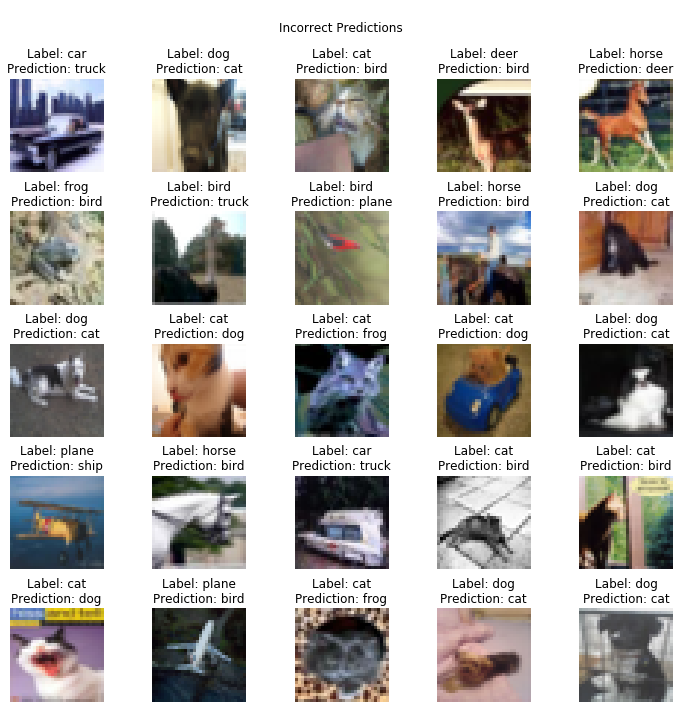

In [0]:
save_and_show_result(correct_samples, incorrect_samples, classes)

## Result Analysis

Displaying accuracy for each class in the entire validation dataset

In [0]:
class_level_accuracy(model, val_loader, device, classes)

Accuracy of plane : 92 %
Accuracy of   car : 96 %
Accuracy of  bird : 87 %
Accuracy of   cat : 81 %
Accuracy of  deer : 92 %
Accuracy of   dog : 85 %
Accuracy of  frog : 94 %
Accuracy of horse : 91 %
Accuracy of  ship : 96 %
Accuracy of truck : 94 %
